<a href="https://colab.research.google.com/github/Lasttrader/LT_finance_and_trading/blob/master/09_04_2023_fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fintech plan

In [ ]:
'''
План:
1. +Разработка коннектор Bybit с записью в БД

2. Разработка отрисовка графиков
+bb
+candles
-external candles

3. Отрисовка индикаторов
+high low
+bb
-external chart

4. Разработка алгоритма BB
5. +Получение high and low, фракталов
6. +Разработка открытия закрытия стоп и Тейк
7. Разработка метода учёта сделок
8. Тестирование алгоритма BB
'''

'\nПлан:\n1. +Разработка коннектор Bybit с записью в БД\n\n2. Разработка отрисовка графиков\n+bb\n+candles\n-external candles\n\n3. Отрисовка индикаторов\n+high low\n+bb\n-external chart\n\n4. Разработка алгоритма BB\n5. +Получение high and low, фракталов\n6. Разработка открытия закрытия стоп и Тейк\n7. Тестирование алгоритма BB\n'

#Import

In [1]:
!pip install pybit
!pip install qgrid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.3 MB/s eta 0:00:00
  Created wheel for pybit: filename=pybit-5.2.0-py2.py3-none-any.whl size=48357 sha256=b0f551e3cad7463d5781f0fcfc5e993342948bcbe29cb6863de5f4f91463d71d
  Stored in directory: /root/.cache/pip/wheels/28/56/f3/a0a2506e41f7e37d23d59a72ddeb4079ae834ba332d734eb07
Successfully built pybit
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 889.2/889.2 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.9 MB/s eta 0:00:00
  Created wheel for qgrid: filename=qgrid-1.3.1-py2.py3-none-any.whl size=1761270 sha256=106d0e476011067f5e40ceea6c

In [2]:

#bybit
import requests 
import json 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import qgrid
import time

#plotly
import plotly.graph_objects as go

print('hello! imports finished success')

#Sources

In [ ]:
'''
Class connectors
Тип коннектора
-тинькоф
-сб РФ
-фридом
-райф
-bybit
-bingx
-БД postgresql
-БД mongodb
-БД clickhouse
-tradingview

Токен: 
Адрес:
БД
Логин
Пароль
'''

In [ ]:
class Sources:
  pass
  
  class Tinkoff:
    pass

  class Sber:
    pass

  class Freedom:
    pass
  
  class Raif:
    pass

  class Bybit:
    pass

  class BingX:
    pass
 
  class Postgresql:
    pass

  class MongoDB:
    pass

  class Clickhouse:    
    pass    

  class Tradingview:    
    pass

In [ ]:
'''
import math
class circle():
    def __init__(self,radius):
        self.radius=radius
    def area(self):
        return math.pi*(self.radius**2)
    def perimeter(self):
        return 2*math.pi*self.radius
 
r=int(input("Enter radius of circle: "))
obj=circle(r)
print("Area of circle:",round(obj.area(),2))
print("Perimeter of circle:",round(obj.perimeter(),2))
'''

'\nimport math\nclass circle():\n    def __init__(self,radius):\n        self.radius=radius\n    def area(self):\n        return math.pi*(self.radius**2)\n    def perimeter(self):\n        return 2*math.pi*self.radius\n \nr=int(input("Enter radius of circle: "))\nobj=circle(r)\nprint("Area of circle:",round(obj.area(),2))\nprint("Perimeter of circle:",round(obj.perimeter(),2))\n'

#ETL

In [ ]:
'''
Class ETL

Тип etl
-sql
-python
'''

class ETL:
  pass

#Connectors

In [4]:
'''Class Источники
Получить коннектор
Def Получить котировку
Def Получить тиковые данные
Market_replay'''

class connectors:
  def getConnector():
    return


#Visualization

In [ ]:
'''Class График
Нарисовать
Сохранить'''

In [ ]:
'''Class Индекаторы 
Горизонтальный объём
Индикатор внешнего таймфрейма
Болшинджер бэндс'''

#Indicators

#Patterns

#Trading and orders (Auto)


#Money management

#Notifications

#Testing

#Machine learning

In [ ]:
'''Class анализ паттернов
Class tech indicators
Проверить при входе
Значение индикаторов в момент сделки
Class управление капиталом
Расчитать размер позиции
Class торговля
Ордер
Тейк
Стоп
Class уведомления
Class машинного обучения
Class screener'''

In [ ]:
'''Get_chart()
Объем повышение
Выставить ордер на минимум
Тейк 1 и 2 до объёма
Ордер на углы по объему V и А 4 часа
Получить график
Разбить на неделю
На день
На 4 часа
Определитт тренд и флэт по объему POC
проанализировать прошлую неделю на:
Углы по 4 часа
На фикспрефикс
На объём прошлой недели 
оценить объём по статистике
выставка ордера
Выставка стопа
Вы вставки Тейк на Макс
Выставка Тейк на х2
Скриншот
Пубшикации
Сопровождения
Скриншоты
Публикация
Статистика
Тренажёр
Подписка
Алгоритмы в торговле
Фикс префикс
 - Вход от фикса
тестирование  обьемного уровня
 - Вход на отскок
Тестирование Макс дельты внешней свечи
 - Вход от последнего уровня
 - Вход через 1 уровень
Зоны продавцов и покупателей
 - Треугольник выход вход на тесте
Торговля по тренду'''

In [ ]:
'''Get-graph 
Получаем график данные
 1. Получение графика и данных
 2. Проверка  времени понедельник 0000
 3.  получение данных недели ohlc
 4. Сравнение с предыдущей неделей
 5. Тип недели тренд, расширение, внутренняя
 6. Проверка BB получение уровней
 7. проверка H4 get dodgi и получение данных +/- 3 бара
 8. Проверка объёмов и дельты получение данных
 9. Проверка внутренней структуры недели где закрытие
 -если внутри то ФПФ
 -если снаружи то тест
 Входы
 Ohlc меньше ohlc - 1
  от ББ
  от уровня боли + зеркала (проверить виделали цена в прошлом)
  от доджи
 через 1 уровень  объема'''

#Workshop

In [37]:
#bybit
# опрделяем функцию, которая будет получать данные и возвращать нам датафрейм pandas
# в качестве аргументов передаём
'''
symbol - тикет криптовалюты, данные по которой хотим получить
interval - интервал, таймфрейм (час, день, неделя и т.д.)

\startTime - время начала 
endTime - конечное время
'''

SYMBOL = 'ETHUSD'
INTERVAL = 240 #in minutes
START_TIME = dt.datetime(2023, 4, 1) #YY-MM-DD
END_TIME = dt.datetime(2023, 5, 10) #YY-MM-DD

def get_bybit_bars(symbol, interval, startTime, endTime): 
    
    #пигем адрес, где получаем данные
    url = "https://api.bybit.com/v2/public/kline/list"
    #определяем начало времени
    startTime = str(int(startTime.timestamp()))
    #определяем конечное время
    endTime   = str(int(endTime.timestamp()))
    #определяем параметры аргументов
    req_params = {"symbol" : symbol, 'interval' : interval, 'from' : startTime, 'to' : endTime}
    #создаем pandas датафрейм
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text)['result'])
    if (len(df.index) == 0):
        return None
    #в качесвте индекса датафрейма будем использовать временную метку
    df.index = [dt.datetime.fromtimestamp(x) for x in df.open_time]
    # возвращаем датафрейм
    return df

#создаем датафрейм и спользуем функцию get_bybit_bars, которую создали
data = get_bybit_bars(SYMBOL, INTERVAL, START_TIME, END_TIME)

'''
проходим циклом по каждой колонке нашей таблицы
пробуем преобразовать данные в тип "число с плавающей точкой", 
т.к. по умолчанию может приходит тип object
'''
for i in data.columns:
  try:
    data[i]=data[i].astype('float')
  except:
    print(f'error {i}')
print(data.info())
#выводим первые 5 строк нашей таблицы
data.head()

error symbol
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2023-04-01 00:00:00 to 2023-05-04 04:00:00
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     200 non-null    object 
 1   interval   200 non-null    float64
 2   open_time  200 non-null    float64
 3   open       200 non-null    float64
 4   high       200 non-null    float64
 5   low        200 non-null    float64
 6   close      200 non-null    float64
 7   volume     200 non-null    float64
 8   turnover   200 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.6+ KB
None


,symbol,interval,open_time,open,high,low,close,volume,turnover
2023-04-01 00:00:00,ETHUSD,240.0,1.680307e+09,1822.40,1842.9,1819.75,1826.75,10064734.0,5501.379511
2023-04-01 04:00:00,ETHUSD,240.0,1.680322e+09,1826.75,1829.8,1811.30,1824.00,15860499.0,8703.315579
2023-04-01 08:00:00,ETHUSD,240.0,1.680336e+09,1824.00,1828.9,1821.80,1824.30,7672381.0,4201.319037
2023-04-01 12:00:00,ETHUSD,240.0,1.680350e+09,1824.30,1827.5,1815.15,1820.35,10271937.0,5640.823003
2023-04-01 16:00:00,ETHUSD,240.0,1.680365e+09,1820.35,1824.4,1808.00,1814.55,14290108.0,7871.162035


[nan, nan, nan, nan, nan, 1825.9, nan, 1824.95, nan, nan, nan, nan, nan, nan, nan, nan, 1839.9, nan, nan, nan, nan, 1892.5, nan, nan, 1926.55, nan, nan, 1943.35, nan, nan, nan, nan, nan, nan, 1882.0, nan, 1882.75, nan, nan, 1863.85, nan, 1872.6, nan, 1879.95, nan, nan, nan, nan, 1860.0, nan, nan, nan, nan, 1874.1, nan, 1866.0, nan, nan, nan, nan, 1938.7, nan, nan, nan, nan, nan, 1897.75, nan, nan, 1933.0, nan, 1931.65, nan, nan, nan, nan, 2024.9, nan, 2139.55, nan, nan, 2125.75, nan, 2122.7, nan, nan, 2112.5, nan, 2110.45, nan, nan, 2103.95, nan, nan, 2146.0, nan, nan, nan, nan, nan, 2088.7, nan, nan, nan, 2125.4, nan, nan, 2108.45, nan, nan, nan, nan, nan, nan, nan, 1965.2, nan, 1983.45, nan, nan, 1956.6, nan, nan, nan, nan, nan, nan, 1865.15, nan, nan, 1886.6, nan, nan, 1876.75, nan, 1882.0, nan, nan, 1889.2, nan, nan, 1875.85, nan, nan, 1850.0, nan, nan, nan, nan, nan, 1883.9, nan, nan, 1964.6, nan, nan, 1938.45, nan, nan, nan, 1937.5, nan, nan, 1923.75, nan, nan, nan, nan, nan, 190

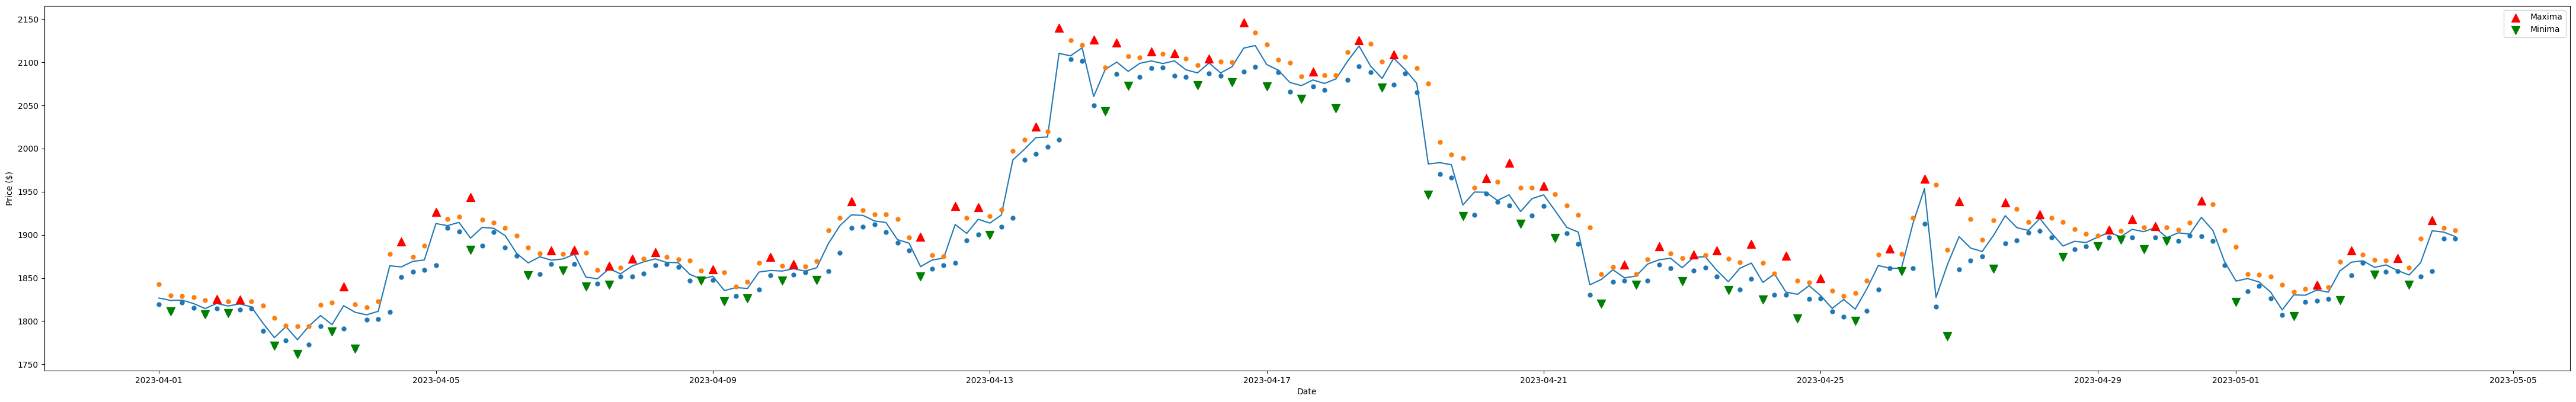

In [38]:

#local max close
data['local_max'] = data['high'][
  (data['high'].shift(1) < data['high']) &
  (data['high'].shift(-1) < data['high'])]

#local min close
data['local_min'] = data['low'][
  (data['low'].shift(1) > data['low']) &
  (data['low'].shift(-1) > data['low'])]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print(list(data['local_max']))
#plot
plt.figure(figsize=(55, 8))
plt.plot(data['close'], zorder=0)
plt.scatter(data.index, data['low'], s=25)
plt.scatter(data.index, data['high'],s=25)
plt.scatter(data.index, data['local_max'], s=100,
  label='Maxima', marker='^', c='r')
plt.scatter(data.index, data['local_min'], s=100,
  label='Minima', marker='v', c='g')
plt.xlabel('Date')
plt.ylabel('Price ($)')
#plt.title(f'Local Maxima and Minima for {ticker}')
plt.legend()
plt.show()

In [ ]:
'''#algo BB
Торговля верхней
Да/нет
Лонг/шорт/оба

Торговля средней

Торговля нижней

Период 1
Настройка

Период 2

Период 3

Лонг:
От Лоя бб
От хая бб

Шорт
От Лоя бб
От хая бб'''

In [40]:
#filters by day_week, to find any day
filter_day = 'D'
day_of_week = 0
days_week = pd.date_range(data.index[0], data.index[-1], freq=filter_day).to_series().dt.dayofweek
days_week[days_week == day_of_week ].index

DatetimeIndex(['2023-04-03', '2023-04-10', '2023-04-17', '2023-04-24',
               '2023-05-01'],
              dtype='datetime64[ns]', freq=None)

In [41]:
# Define the parameters for the Bollinger Band calculation
ma_size = 21
bol_size = 2
# Calculate the SMA
data.insert(0, 'moving_average', data['close'].rolling(ma_size).mean())
# Calculate the upper and lower Bollinger Bands
data.insert(0, 'bol_upper', data['moving_average'] + data['close'].rolling(ma_size).std() * bol_size)
data.insert(0, 'bol_lower', data['moving_average'] - data['close'].rolling(ma_size).std() * bol_size)
# Remove the NaNs -> consequence of using a non-centered moving average
#data.dropna(inplace=True)
data.head()

ValueError: ignored

In [42]:
#графики
#plotly
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

# Plot the three lines of the Bollinger Bands indicator
for parameter in ['moving_average', 'bol_lower', 'bol_upper']:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[parameter],
        showlegend = False,
        line_color = 'gray',
        mode='lines',
        line={'dash': 'dash'},
        marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))

# Plot local max
fig.add_trace(go.Scatter(x = data.index,
                         y = data['local_max'],
                         showlegend = True,
                         line_color = 'orange',
                         mode='markers',
                         line={'dash': 'dash'},
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot loacal min
fig.add_trace(go.Scatter(x = data.index,
                         y = data['local_min'],
                         showlegend = True,
                         line_color = 'skyblue',
                         mode='markers',
                         line={'dash': 'dash'},
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the days_week vertical lines
for indexes, day in days_week.items():
    if day == 1:
        fig.add_vline(x=indexes, 
        line_width=1, 
        line_dash="dash", 
        line_color="green")


fig.update_layout(
    autosize=False,
    width= 1100,
    height=800,)
fig.show()

In [43]:
data

,bol_lower,bol_upper,moving_average,symbol,interval,open_time,open,high,low,close,volume,turnover,local_max,local_min
2023-04-01 00:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680307e+09,1822.40,1842.90,1819.75,1826.75,10064734.0,5501.379511,NaN,NaN
2023-04-01 04:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680322e+09,1826.75,1829.80,1811.30,1824.00,15860499.0,8703.315579,NaN,1811.30
2023-04-01 08:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680336e+09,1824.00,1828.90,1821.80,1824.30,7672381.0,4201.319037,NaN,NaN
2023-04-01 12:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680350e+09,1824.30,1827.50,1815.15,1820.35,10271937.0,5640.823003,NaN,NaN
2023-04-01 16:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680365e+09,1820.35,1824.40,1808.00,1814.55,14290108.0,7871.162035,NaN,1808.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-03 12:00:00,1803.192479,1915.917045,1859.554762,ETHUSD,240.0,1.683115e+09,1858.60,1862.05,1842.15,1853.45,21793481.0,11769.706861,NaN,1842.15
2023-05-03 16:00:00,1804.863139,1910.965432,1857.914286,ETHUSD,240.0,1.683130e+09,1853.45,1895.25,1851.40,1867.80,57683774.0,30713.325710,NaN,NaN
2023-05-03 20:00:00,1804.401330,1911.793908,1858.097619,ETHUSD,240.0,1.683144e+09,1867.80,1916.60,1857.65,1904.65,29759743.0,15729.790103,1916.6,NaN
2023-05-04 00:00:00,1807.141451,1907.425215,1857.283333,ETHUSD,240.0,1.683158e+09,1904.65,1907.80,1895.35,1903.10,10478778.0,5510.492248,NaN,NaN


1000 [48, 39, 82, 21, 13, 8, 10, 67, 73, 44, 72, 92, 66, 3, 31, 67, 18, 1, 92, 57, 27, 38, 68, 8, 25, 78, 2, 5, 51, 74, 67, 30, 85, 58, 49, 23, 71, 84, 2, 40, 54, 18, 81, 70, 65, 72, 56, 25, 51, 31, 62, 17, 15, 72, 26, 82, 91, 20, 50, 71, 5, 32, 61, 88, 44, 46, 88, 37, 11, 87, 80, 93, 64, 91, 51, 33, 68, 6, 14, 96, 7, 5, 24, 52, 71, 96, 52, 52, 97, 78, 94, 93, 39, 85, 77, 46, 81, 22, 27, 78, 2, 68, 40, 92, 39, 87, 42, 40, 48, 36, 27, 74, 69, 2, 78, 7, 82, 68, 79, 89, 6, 13, 2, 21, 85, 30, 77, 29, 57, 53, 81, 3, 75, 45, 81, 92, 22, 28, 37, 78, 59, 36, 57, 77, 14, 94, 57, 11, 47, 36, 96, 4, 30, 4, 18, 29, 56, 2, 75, 23, 96, 62, 92, 12, 58, 24, 52, 96, 89, 18, 29, 29, 19, 37, 63, 60, 92, 57, 29, 74, 47, 86, 47, 80, 18, 53, 63, 2, 92, 34, 70, 79, 58, 94, 37, 3, 67, 28, 50, 33, 53, 92, 91, 49, 64, 42, 85, 3, 38, 82, 90, 4, 69, 24, 77, 77, 44, 7, 19, 62, 76, 59, 44, 36, 50, 29, 89, 75, 81, 49, 94, 46, 55, 93, 54, 12, 62, 27, 8, 66, 31, 6, 51, 70, 52, 52, 19, 64, 37, 71, 12, 56, 43, 27, 91, 3

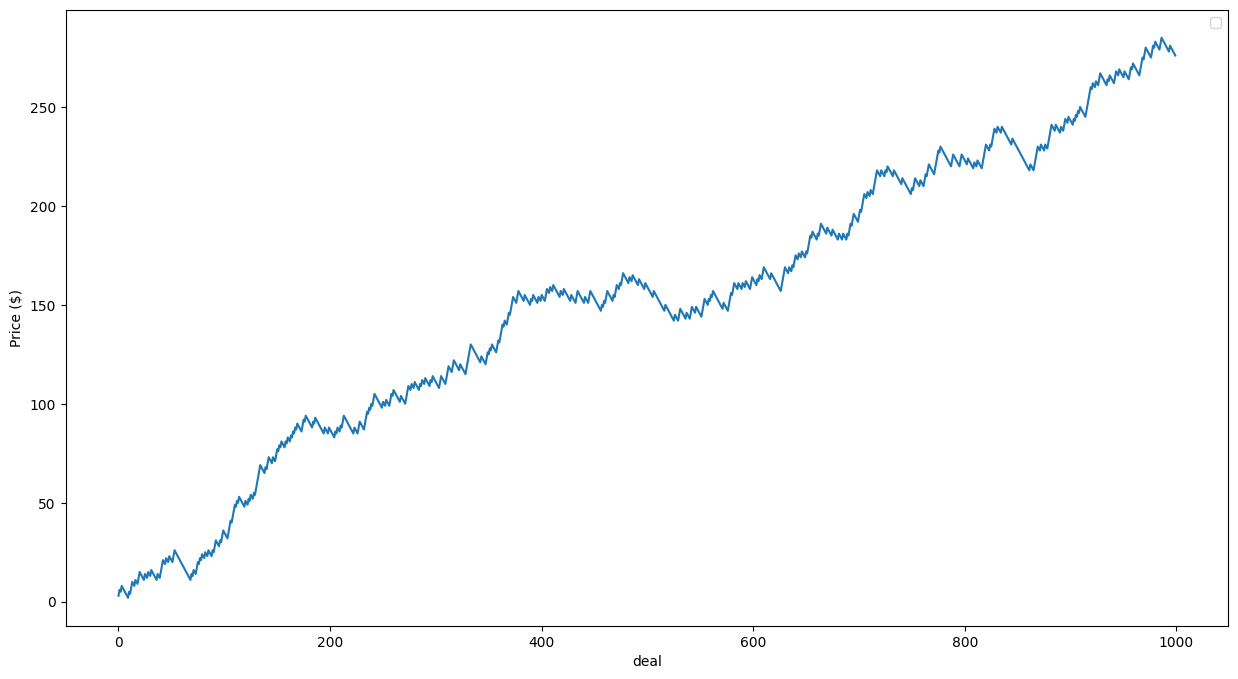

In [33]:
# check

import random
randomlist = []
for i in range(0,1000):
  n = random.randint(1,97)
  randomlist.append(n)
print(len(randomlist), randomlist)

#income curve
curve = []
q=0
for i in range(len(randomlist)):
  #print(i)
  if randomlist[i]%3 == 0:
    q += 3
    curve.append(q)
  else: 
    q -= 1
    curve.append(q)
print(len(curve), curve)
#plot
plt.figure(figsize=(15, 8))
plt.plot(curve)
plt.xlabel('deal')
plt.ylabel('Price ($)')
#plt.title(f'Local Maxima and Minima for {ticker}')
plt.legend()
plt.show()

In [44]:
# simple trader
data['long_position'] = None
data['long_stop_loss'] = None
data['long_take_profit'] = None

data['short_position'] = None
data['short_stop_loss'] = None
data['short_take_profit'] = None

long_position_list = []
long_stop_loss_list = []
long_take_profit_list = []

short_position_list = []
short_stop_loss_list = []
short_take_profit_list = []

for i in range(len(data['high'])):
  #check the trend
  if (data['high'][i] > data['high'][i-1]) & (data['low'][i] > data['low'][i-1]) & (data['close'][i] > data['close'][i-1]):
    print(f'BUY {i}', data['close'][i-1])

    #open long position
    long_position = data['close'][i-1]
    data['long_position'][i] = long_position
    long_position_list.append(long_position)
    
    #place SL
    stop_loss = data['low'][i-1] - 10
    data['long_stop_loss'][i] = stop_loss
    long_stop_loss_list.append(stop_loss)

    #place TP
    take_profit = long_position + (long_position - stop_loss) * 3
    data['long_take_profit'][i] = take_profit
    long_take_profit_list.append(take_profit)

  if (data['high'][i] < data['high'][i-1]) & (data['low'][i] < data['low'][i-1]) & (data['close'][i] < data['close'][i-1]):
    print(f'SELL {i}', data['close'][i-1])

    short_position = data['close'][i-1]
    data['short_position'][i] = short_position
    short_position_list.append(short_position)
    
    #place SL
    short_stop_loss = data['high'][i-1] + 10
    data['short_stop_loss'][i] = short_stop_loss
    short_stop_loss_list.append(short_stop_loss)

    #place TP
    short_take_profit = short_position - (short_stop_loss - short_position) * 3
    data['short_take_profit'][i] = short_take_profit
    short_take_profit_list.append(short_take_profit)

data.head(5)

SELL 0 1897.95
SELL 1 1826.75
SELL 3 1824.3
SELL 4 1820.35
BUY 5 1814.55
SELL 6 1820.5
BUY 7 1817.55
SELL 9 1816.55
SELL 10 1797.9
SELL 12 1793.8
BUY 13 1778.5
BUY 14 1794.3
BUY 16 1795.95
SELL 17 1817.95
BUY 19 1807.3
BUY 20 1811.4
BUY 23 1869.2
BUY 24 1870.9
SELL 30 1907.6
SELL 31 1899.05
SELL 32 1878.45
BUY 36 1872.0
SELL 37 1877.5
BUY 41 1854.8
BUY 43 1868.6
SELL 45 1868.0
SELL 46 1867.65
SELL 47 1854.3
BUY 48 1848.55
SELL 49 1852.0
BUY 52 1837.8
BUY 53 1856.85
SELL 54 1858.7
BUY 55 1858.0
BUY 58 1861.8
BUY 59 1889.55
BUY 60 1910.45
SELL 63 1916.05
SELL 64 1914.2
SELL 65 1894.35
BUY 69 1873.1
BUY 71 1901.6
SELL 72 1917.95
BUY 73 1913.55
BUY 74 1922.8
BUY 75 1986.75
BUY 76 1998.95
BUY 78 2013.25
BUY 83 2091.35
SELL 84 2099.95
BUY 86 2098.55
SELL 89 2101.4
SELL 90 2091.0
BUY 91 2087.45
SELL 92 2099.0
BUY 94 2094.65
SELL 96 2119.2
SELL 98 2090.65
SELL 99 2076.45
BUY 100 2072.7
SELL 101 2079.3
BUY 103 2080.55
BUY 104 2100.95
SELL 105 2118.6
SELL 106 2095.3
BUY 107 2081.1
SELL 109 2091.

<ipython-input-44-050c799599c5>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-050c799599c5>:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-050c799599c5>:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-050c799599c5>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

BUY 133 1861.85
SELL 136 1858.95
BUY 138 1861.2
SELL 139 1867.25
SELL 142 1833.6
SELL 145 1829.65
BUY 148 1813.95
BUY 149 1837.2
SELL 151 1861.3
BUY 152 1861.15
BUY 153 1913.0
SELL 154 1953.5
BUY 156 1865.8
BUY 160 1899.6
BUY 163 1905.05
SELL 164 1918.85
SELL 165 1902.2
BUY 169 1897.2
SELL 170 1902.65
BUY 171 1897.7
SELL 172 1906.35
BUY 173 1903.6
SELL 174 1908.3
SELL 178 1920.2
SELL 179 1904.9
SELL 180 1869.05
SELL 183 1845.3
SELL 184 1833.55
BUY 187 1830.0
BUY 190 1858.15
SELL 192 1869.9
SELL 195 1858.6
BUY 196 1853.45
BUY 197 1867.8


,bol_lower,bol_upper,moving_average,symbol,interval,open_time,open,high,low,close,volume,turnover,local_max,local_min,long_position,long_stop_loss,long_take_profit,short_position,short_stop_loss,short_take_profit
2023-04-01 00:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680307e+09,1822.40,1842.9,1819.75,1826.75,10064734.0,5501.379511,NaN,NaN,None,None,None,1897.95,1914.9,1847.1
2023-04-01 04:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680322e+09,1826.75,1829.8,1811.30,1824.00,15860499.0,8703.315579,NaN,1811.3,None,None,None,1826.75,1852.9,1748.3
2023-04-01 08:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680336e+09,1824.00,1828.9,1821.80,1824.30,7672381.0,4201.319037,NaN,NaN,None,None,None,None,None,None
2023-04-01 12:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680350e+09,1824.30,1827.5,1815.15,1820.35,10271937.0,5640.823003,NaN,NaN,None,None,None,1824.3,1838.9,1780.5
2023-04-01 16:00:00,NaN,NaN,NaN,ETHUSD,240.0,1.680365e+09,1820.35,1824.4,1808.00,1814.55,14290108.0,7871.162035,NaN,1808.0,None,None,None,1820.35,1837.5,1768.9


In [45]:

#графики
#plotly
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['open'],
                high=data['high'],
                low=data['low'],
                close=data['close'])])

# Plot the three lines of the Bollinger Bands indicator
for parameter in ['moving_average', 'bol_lower', 'bol_upper']:
    fig.add_trace(go.Scatter(
        x = data.index,
        y = data[parameter],
        showlegend = False,
        line_color = 'gray',
        mode='lines',
        line={'dash': 'dash'},
        marker_line_width=2, 
        marker_size=10,
        opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['local_max'],
#                          showlegend = True,
#                          line_color = 'orange',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['local_min'],
#                          showlegend = True,
#                          line_color = 'skyblue',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
fig.add_trace(go.Scatter(x = data.index,
                         y = data['long_position'],
                         showlegend = True,
                         line_color = 'skyblue',
                         mode='markers',
                         line={'dash': 'dash'},
                         name='BUY signal',
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['long_stop_loss'],
#                          showlegend = True,
#                          line_color = 'red',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['long_take_profit'],
#                          showlegend = True,
#                          line_color = 'green',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
fig.add_trace(go.Scatter(x = data.index,
                         y = data['short_position'],
                         showlegend = True,
                         line_color = 'orange',
                         mode='markers',
                         line={'dash': 'dash'},
                         name = 'SELL signal',
                         marker_line_width=2, 
                         marker_size=5,
                         opacity = 0.8))

# Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['short_stop_loss'],
#                          showlegend = True,
#                          line_color = 'red',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))

# # Plot the three lines of the Bollinger Bands indicator
# fig.add_trace(go.Scatter(x = data.index,
#                          y = data['short_take_profit'],
#                          showlegend = True,
#                          line_color = 'green',
#                          mode='markers',
#                          line={'dash': 'dash'},
#                          marker_line_width=2, 
#                          marker_size=5,
#                          opacity = 0.8))


# Plot the days_week vertical lines
for indexes, day in days_week.items():
    if day == 1:
        fig.add_vline(x=indexes, 
        line_width=1, 
        line_dash="dash", 
        line_color="green")


fig.update_layout(
    autosize=False,
    width= 1500,
    height=1000,)
fig.show()

In [36]:
from datetime import datetime, timedelta

def get_next_monday():
    today = datetime.today()
    days_until_monday = (7 - today.weekday()) % 7
    next_monday = today + timedelta(days=days_until_monday)
    return next_monday.replace(hour=0, minute=0)

print(get_next_monday())

2023-05-15 00:00:49.276827
